In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 40
p = 3

sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=1, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=p,
    MOOD=True,
    cascade="full",
    max_MOOD_iters=N,
    PAD={"rho": (0.0, 1.0)},
    PAD_atol=1e-14,
)

In [3]:
sim.run(n=20, q_max=2)

Step #20 @ t=2.00e-01 | dt=1.00e-02 | (done)                                                        


In [4]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(-5.462908939820448e-15), np.float64(1.000000000000005))

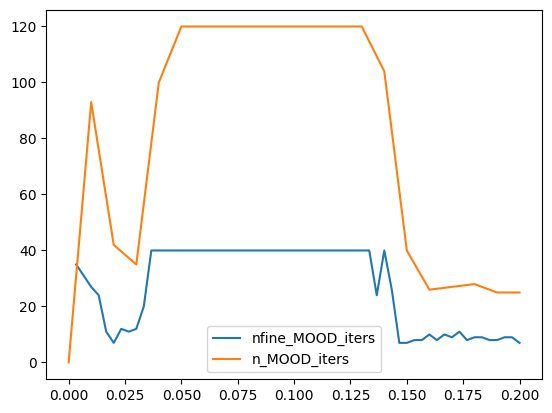

In [5]:
fig, ax = plt.subplots()
vis.plot_timeseries(sim, ax, "nfine_MOOD_iters", label="nfine_MOOD_iters")
vis.plot_timeseries(sim, ax, "n_MOOD_iters", label="n_MOOD_iters")
ax.legend()

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.4875
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.4875
  warnings.warn(


rho w
rho w


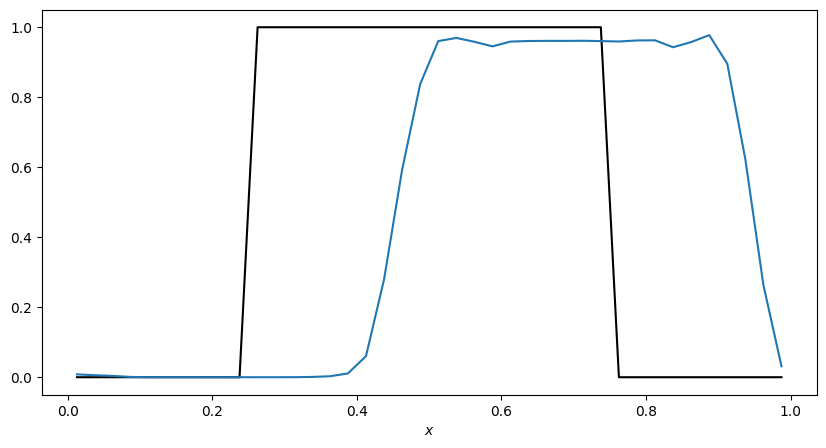

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, xlabel=True)

rho w


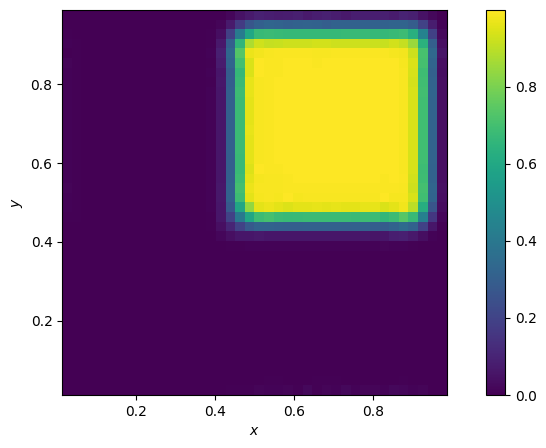

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "rho", cell_averaged=True)
ax.figure.colorbar(ax.images[0], ax=ax)

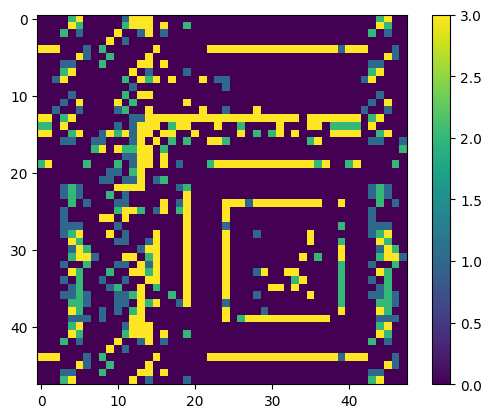

In [8]:
plt.imshow(sim.arrays["_cascade_idx_array_"][0, :, :, 0])
plt.colorbar()

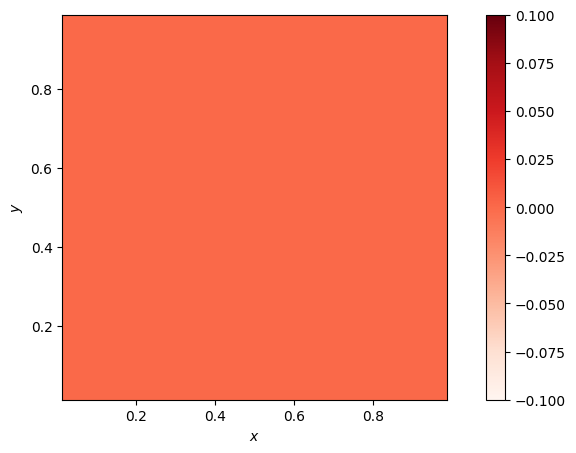

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "troubles", cmap=plt.cm.Reds)
ax.figure.colorbar(ax.images[0], ax=ax)

In [10]:
sim.arrays["_cascade_idx_array_"].shape

(1, 48, 48, 1)

In [11]:
sim.timer.print_report()

Category                                               Calls      Cumulative Time
-----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                          1                 1.67
AdvectionSolver.log_quantity                              22                 0.00
ExplicitODESolver.integrate                                1                 1.68
ExplicitODESolver.take_step                               20                 1.66
FiniteVolumeSolver.f                                      60                 1.66
FiniteVolumeSolver.inplace_apply_bc                     2738                 0.14
FiniteVolumeSolver.inplace_compute_fluxes                240                 0.48
FiniteVolumeSolver.inplace_integrate_fluxes              480                 0.14
FiniteVolumeSolver.inplace_interpolate_faces             480                 0.29
FiniteVolumeSolver.riemann_solver                        480                 0.06
FiniteVolumeSo